# Assignment 6: Neural Networks


### You will continue work on the Digit Recognition problem in Kaggle.com this week.   As in Assignment 5, we will assess classification performance accuracy and processing time. 
### Python TensorFlow should be used for Assignment 6. (If you experience difficulty installing TensorFlow, Python scikit-learn may be used as an alternative for Assignment 6.)


## benchmark experiment:

Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). 
But due to the time required to fit each neural network, we will observe only one trial for each cell in the design. You will build your models on train.csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial..

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

Students are encouraged to work in study teams on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results. 

## Deliverable: 
    In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments.
     Processing time will be recorded for the fitting on the train.csv.  Kaggle.com accuracy scores will be reported for all benchmarks.  

# Management Question
    Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits.
     What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

In [13]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

import tensorflow as tf
from tensorflow import keras
import pydot
import graphviz
import getpass

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV





In [16]:
#password block
try:
   pwd = getpass.getpass()
except Exception as err:
   print('Error Occured : ', err)
else:
   print('Password has been entered and is character length:', len(pwd))


Password has been entered and is character length: 12


In [17]:
#sender block
try:
   sender = getpass.getpass()
except Exception as err:
   print('Error Occured : ', err)
else:
   print('Password has been entered and is character length:', len(pwd))

Password has been entered and is character length: 12


In [ ]:
#reciever block
try:
   reciever = getpass.getpass()
except Exception as err:
   print('Error Occured : ', err)
else:
   print('Password has been entered and is character length:', len(pwd))

In [4]:
# read data for the Boston Housing Study
Digit_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/Digits-Train.csv")
Digit_test = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/test.csv")
#sets random seed for entire notebook
RANDOM_SEED = 1

#kfold for CV of models
kfold = KFold(n_splits=5, random_state=RANDOM_SEED)
testkfold = KFold(n_splits=2, random_state=RANDOM_SEED)

In [6]:
Digit_input.label.value_counts().sort_values()

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

In [7]:
#splits into validation and train.
train, val =  train_test_split(Digit_input, test_size = 0.2, random_state = RANDOM_SEED)


y_train = train.label.copy()
X_train = train.drop('label', axis=1)


y_val = val.label.copy()
X_val = val.drop('label', axis=1)

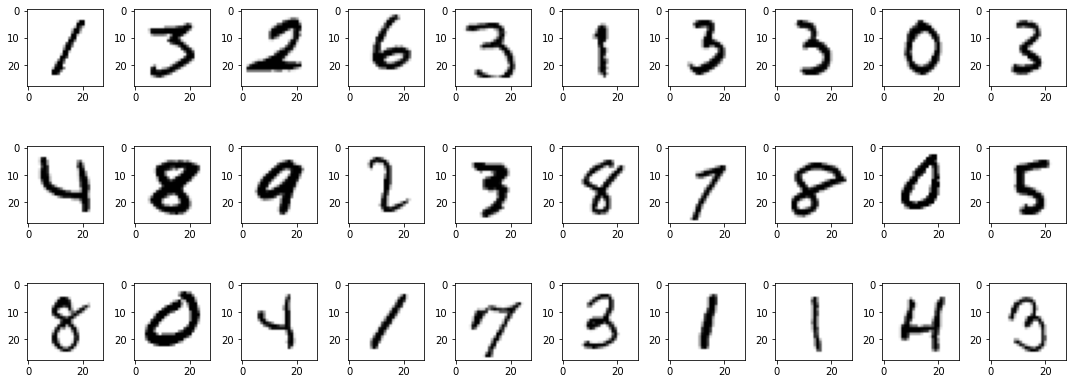

In [8]:
## plots the first 30 digits in 3 rows of 10 images. Data is unscaled
num_row = 3
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(30):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(X_train.iloc[i]).reshape(28,28), cmap='gist_yarg')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [9]:
#Scales within pipeline to ensure same scaler.

scale = Pipeline([
        ('scaler', MinMaxScaler())
        ])
        
X_train = scale.fit_transform(X_train)
x_val = scale.fit_transform(X_val)

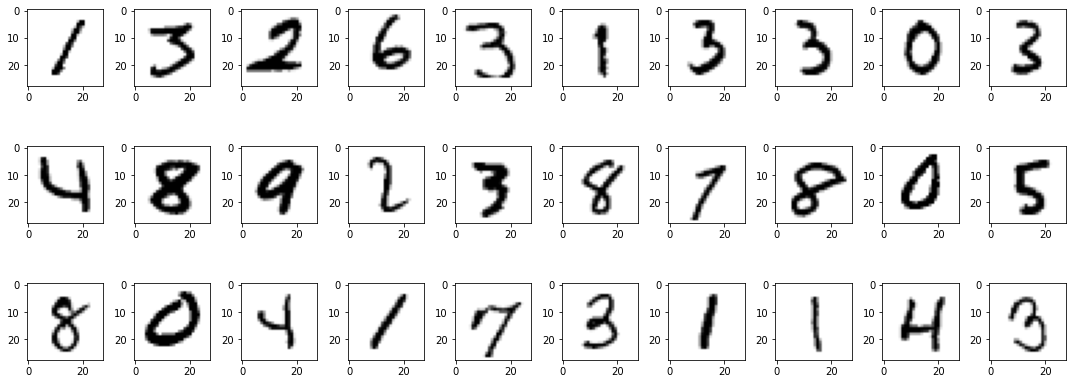

In [10]:
## plots the first 30 digits in 3 rows of 10 images. Data is unscaled
num_row = 3
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(30):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i].reshape(28,28), cmap='gist_yarg')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# Builds and compiles model_2L10N (2 layers; 10 nodes)

In [11]:
model_2L10N= keras.models.Sequential()
model_2L10N.add(keras.layers.Flatten(input_shape=[28,28]))
model_2L10N.add(keras.layers.Dense(10, activation ='relu'))
model_2L10N.add(keras.layers.Dense(10, activation ='softmax'))

model_2L10N.summary()
model_2L10N.compile(loss= "sparse_categorical_crossentropy", 
    optimizer = 'sgd', 
    metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [12]:
start=datetime.now()

train_2L10N = model_2L10N.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

after_fit = datetime.now()
elapsed = after_fit-start
train_2L10N_elapsed= elapsed.total_seconds()


Epoch 1/30
1050/1050 [==============================] - 2s 2ms/step - loss: 1.6921 - accuracy: 0.4740 - val_loss: 44.9670 - val_accuracy: 0.8289
Epoch 2/30
1050/1050 [==============================] - 1s 999us/step - loss: 0.5717 - accuracy: 0.8429 - val_loss: 43.9300 - val_accuracy: 0.8726
Epoch 3/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4196 - accuracy: 0.8805 - val_loss: 44.3661 - val_accuracy: 0.8848
Epoch 4/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3743 - accuracy: 0.8931 - val_loss: 46.2423 - val_accuracy: 0.8877
Epoch 5/30
1050/1050 [==============================] - 1s 974us/step - loss: 0.3565 - accuracy: 0.8976 - val_loss: 45.9528 - val_accuracy: 0.8929
Epoch 6/30
1050/1050 [==============================] - 1s 959us/step - loss: 0.3321 - accuracy: 0.9038 - val_loss: 46.6790 - val_accuracy: 0.8923
Epoch 7/30
1050/1050 [==============================] - 1s 995us/step - loss: 0.3153 - accuracy: 0.9102 - val_loss: 45.2455 

In [14]:
model_2L10N_accuracy = np.max(train_2L10N.history['accuracy']).round(3)

In [19]:

import smtplib
sender = str(sender)
reciever = str(reciever)

gmail_user = sender
gmail_password = pwd

sent_from = gmail_user
to = reciever
subject = 'Your Task has completed'
body = 'check your task taht was running\n\n- You'

email_text = """\
From: %s
To: %s
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject, body)

try:
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(sent_from, to, email_text)
    server.close()

    print ('Email sent!')
except:
    print ('Something went wrong...')

Email sent!
